<a href="https://colab.research.google.com/github/Dullard-boy/Hamoye-Data-Science-Summer-Internship/blob/main/Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
data=pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [74]:
data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [75]:
data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [76]:
data['FullDate']=pd.to_datetime(data['FullDate'])

In [77]:
data.set_index('FullDate', inplace=True)

In [78]:
data_daily=data.resample('D').sum()

In [79]:
data_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


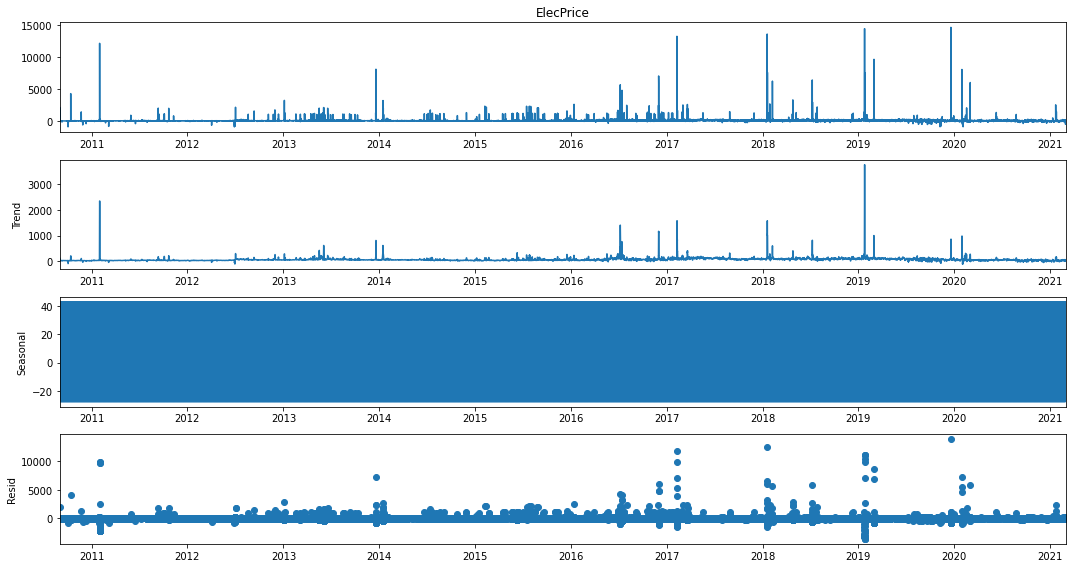

In [109]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(data['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

In [81]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['Tmax'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {v}')

ADF Statistic: -34.907348678213424
p-value: 0.0
No. of lags used: 67
No. of observations used : 91948
Critical Values:
 1%: -3.430421121531399
 5%: -2.861571434572286
 10%: -2.566786731528145


In [111]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_daily['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {v}')

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [110]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_daily['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {v}')

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


In [112]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_daily['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {v}')

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1%: -3.432066157296446
 5%: -2.8622983040036005
 10%: -2.5671736550459663


In [85]:
data_log = np.log(data)
data_diff = data_log.diff(periods=1)

In [87]:
df=pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df['FullDate']= pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace=True)
df=df.resample('D').sum()
df = df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})

In [88]:
train_data=df.iloc[:2757]
test_data=df.iloc[2757:]

In [89]:
train_data.shape

(2757, 4)

In [93]:
!pip fbprophet
from prophet import Prophet
model=Prophet()

ERROR: unknown command "fbprophet"


In [99]:
train_data=train_data.reset_index()
train_data = train_data.rename(columns={"FullDate": "ds"})

In [101]:
model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb5smkjt/gs_t7rn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb5smkjt/7hv2fvea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54862', 'data', 'file=/tmp/tmplb5smkjt/gs_t7rn3.json', 'init=/tmp/tmplb5smkjt/7hv2fvea.json', 'output', 'file=/tmp/tmp9ilak4ta/prophet_model-20221004010355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:03:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:03:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [120]:
test_data=test_data.reset_index()
test_data = test_data.rename(columns={"FullDate": "ds"})
future = test_data
forecast1 = model.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-03-20,2521.998098,6.984687,5066.814008
1,2018-03-21,2675.181324,248.471906,4946.117124
2,2018-03-22,2774.036399,470.908979,5248.447700
3,2018-03-23,2566.035844,278.947878,4891.182531
4,2018-03-24,2241.126584,-155.655980,4629.361087
...,...,...,...,...
1072,2021-02-24,3410.743291,479.186204,6162.837378
1073,2021-02-25,3477.583734,483.620437,6225.533014
1074,2021-02-26,3244.380463,219.350309,5860.470709
1075,2021-02-27,2901.031053,0.344067,5782.862082


In [125]:
forecast1['yhat'].idxmax()

842

In [126]:
forecast1.iloc[842]

ds                            2020-07-09 00:00:00
trend                                 3322.904616
yhat_lower                            1949.135876
yhat_upper                            7266.252507
trend_lower                           2135.522233
trend_upper                           4398.902906
additive_terms                        1346.455347
additive_terms_lower                  1346.455347
additive_terms_upper                  1346.455347
weekly                                 257.111039
weekly_lower                           257.111039
weekly_upper                           257.111039
yearly                                1089.344308
yearly_lower                          1089.344308
yearly_upper                          1089.344308
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                  4669.359963
Name: 842, dtype: object

In [104]:
model2=Prophet()
model2.add_regressor('SysLoad')
model2.add_regressor('Tmax')
model2.add_regressor('GasPrice')
model2.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb5smkjt/nx6jutph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplb5smkjt/13wovy5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57768', 'data', 'file=/tmp/tmplb5smkjt/nx6jutph.json', 'init=/tmp/tmplb5smkjt/13wovy5c.json', 'output', 'file=/tmp/tmpf0d64nnf/prophet_model-20221004011708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [108]:
test_data=test_data.reset_index()
test_data = test_data.rename(columns={"FullDate": "ds"})
future = test_data
forecast = model2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-03-20,1988.494818,-127.770418,4369.649399
1,2018-03-21,1980.063539,-222.454035,4175.831224
2,2018-03-22,2899.369177,641.457709,4971.748254
3,2018-03-23,2583.628888,347.928166,4855.355960
4,2018-03-24,1437.347502,-850.111686,3842.345382
...,...,...,...,...
1072,2021-02-24,961.208123,-1373.198152,3366.923581
1073,2021-02-25,1320.421177,-1031.174502,3780.844731
1074,2021-02-26,1383.914142,-887.179396,3819.140307
1075,2021-02-27,1038.834888,-1272.883748,3455.040144


In [122]:
forecast['yhat'].idxmax()

443

In [123]:
forecast.iloc[443]

ds                                 2019-06-06 00:00:00
trend                                       2172.91353
yhat_lower                                 3846.675015
yhat_upper                                  8354.33602
trend_lower                                1980.498951
trend_upper                                2376.509521
GasPrice                                   3420.445848
GasPrice_lower                             3420.445848
GasPrice_upper                             3420.445848
SysLoad                                     239.319798
SysLoad_lower                               239.319798
SysLoad_upper                               239.319798
Tmax                                          0.246963
Tmax_lower                                    0.246963
Tmax_upper                                    0.246963
additive_terms                             3935.484528
additive_terms_lower                       3935.484528
additive_terms_upper                       3935.484528
extra_regr

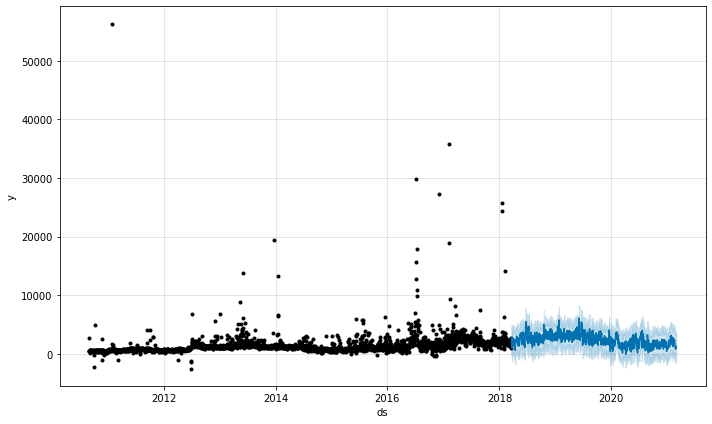

In [113]:
model2.plot(forecast)
plt.show()